#### 병원 정보를 가져 옵니다.

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [2]:
import json
path = './hospital_info.json'

with open(path, 'r') as rf:
    json_file = rf.read()
result = json.loads(json_file)
df1 = DataFrame(result)

In [3]:
df1.clCdNm.value_counts()

의원       31078
치과의원     17444
한의원      14133
보건진료소     1905
요양병원      1539
병원        1473
보건지소      1316
한방병원       313
종합병원       302
보건소        241
치과병원       232
상급종합        42
조산원         26
보건의료원       16
Name: clCdNm, dtype: int64

#### 치과 의원만 가져오고 주소를 d1=시도, d2=시군구 컬럼으로 나눈다.

In [4]:
# 치과의원
dent_df = df1[df1.clCdNm=='치과의원']
dent_df = pd.DataFrame(dent_df.addr.apply(lambda v: v.split()[:2]).tolist(),
                            columns=('d1', 'd2'))
dent_df

,d1,d2
0,서울특별시,영등포구
1,전라북도,전주시
2,전라북도,전주시
3,경기도,수원시
4,광주광역시,서구
5,인천광역시,남구
6,서울특별시,강남구
7,경기도,화성시
8,전라북도,김제시
9,경기도,성남시


###  치과의원이 많은곳을 살펴 보겠습니다.

In [5]:
dent_count_df = dent_df.apply(lambda r: r['d1'] + ' ' + r['d2'] if r['d2'] else r['d1'], axis=1).value_counts()
dent_count_df.head(20)

서울특별시 강남구     573
경기도 성남시       448
경기도 수원시       428
서울특별시 서초구     319
서울특별시 송파구     319
경상남도 창원시      317
경기도 고양시       304
경기도 용인시       299
경기도 부천시       280
전라북도 전주시      254
충청북도 청주시      244
경기도 안양시       243
서울특별시 영등포구    231
서울특별시 중구      212
서울특별시 강동구     212
대전광역시 서구      209
서울특별시 강서구     207
서울특별시 관악구     205
서울특별시 마포구     199
대구광역시 달서구     193
dtype: int64

#### 전체 주소 데이터를 가져온다.

In [6]:
path =  './road_code_total.txt'
addr_list = list()
with open(path, 'r',  encoding = 'utf-8') as rf:
    for line in rf:
        addr_info = line.split("|")
        addr_list.append({'d1' : addr_info[5].strip(), 'd2' : addr_info[6].strip().split(' ',1)[0]})

addr_df = DataFrame(addr_list).drop_duplicates()
# 인덱스 설정
addr_df.index = addr_df.apply(lambda r:  r['d1'] + ' ' + r['d2'] if r['d2'] else r['d1'], axis=1)

In [7]:
addr_df

,d1,d2
서울특별시 종로구,서울특별시,종로구
서울특별시 중구,서울특별시,중구
서울특별시 용산구,서울특별시,용산구
서울특별시 성동구,서울특별시,성동구
서울특별시 광진구,서울특별시,광진구
서울특별시 동대문구,서울특별시,동대문구
서울특별시 중랑구,서울특별시,중랑구
서울특별시 성북구,서울특별시,성북구
서울특별시 강북구,서울특별시,강북구
서울특별시 도봉구,서울특별시,도봉구


### 병원 주소 데이터와 전체 주소 데이터를  join 합니다.

In [8]:
dent_t_count = pd.DataFrame({'count': dent_count_df}).fillna(0)
dent_t_df = pd.merge(addr_df, dent_t_count, how='outer', left_index=True, right_index=True)
dent_t_df

,d1,d2,count
강원도 강릉시,강원도,강릉시,54.0
강원도 고성군,강원도,고성군,5.0
강원도 동해시,강원도,동해시,25.0
강원도 삼척시,강원도,삼척시,14.0
강원도 속초시,강원도,속초시,29.0
강원도 양구군,강원도,양구군,5.0
강원도 양양군,강원도,양양군,5.0
강원도 영월군,강원도,영월군,6.0
강원도 원주시,강원도,원주시,97.0
강원도 인제군,강원도,인제군,6.0


#### join 이 안된 데이터가 있는지 확인합니다.

In [9]:
nan_rows = dent_t_df[dent_t_df['count'].isnull()]
nan_rows

,d1,d2,count
세종특별자치시,세종특별자치시,,NaN


In [10]:
nan_rows = dent_t_df[dent_t_df['d1'].isnull()]
nan_rows

,d1,d2,count
세종특별자치시 고운서길,NaN,NaN,1.0
세종특별자치시 금남면,NaN,NaN,3.0
세종특별자치시 금송로,NaN,NaN,1.0
세종특별자치시 나성로,NaN,NaN,1.0
세종특별자치시 남세종로,NaN,NaN,1.0
세종특별자치시 다솜2로,NaN,NaN,1.0
세종특별자치시 다정중앙로,NaN,NaN,1.0
세종특별자치시 달빛로,NaN,NaN,3.0
세종특별자치시 도움1로,NaN,NaN,2.0
세종특별자치시 도움3로,NaN,NaN,4.0


#### 세종특별자치시가 안되었군요. 주소 가져오는 로직을 수정합니다.

In [11]:
dent_count_df = dent_df.apply(lambda r: r['d1'] + ' ' + r['d2'] if r['d2'] and r['d1'][:2]!='세종' else r['d1'], axis=1).value_counts()
dent_count_df.head(20)

서울특별시 강남구     573
경기도 성남시       448
경기도 수원시       428
서울특별시 서초구     319
서울특별시 송파구     319
경상남도 창원시      317
경기도 고양시       304
경기도 용인시       299
경기도 부천시       280
전라북도 전주시      254
충청북도 청주시      244
경기도 안양시       243
서울특별시 영등포구    231
서울특별시 중구      212
서울특별시 강동구     212
대전광역시 서구      209
서울특별시 강서구     207
서울특별시 관악구     205
서울특별시 마포구     199
대구광역시 달서구     193
dtype: int64

In [12]:
path =  './road_code_total.txt'
addr_list = list()
with open(path, 'r',  encoding = 'utf-8') as rf:
    for line in rf:
        addr_info = line.split("|")
        addr_list.append({'d1' : addr_info[5].strip(), 'd2' : addr_info[6].strip().split(' ',1)[0]})

addr_df = DataFrame(addr_list).drop_duplicates()
# 인덱스 설정
addr_df.index = addr_df.apply(lambda r:  r['d1'] + ' ' + r['d2'] \
                              if r['d2'] and r['d1'][:2]!='세종' else r['d1'], axis=1)

In [13]:
dent_t_count = pd.DataFrame({'count': dent_count_df}).fillna(0)
dent_t_df = pd.merge(addr_df, dent_t_count, how='outer', left_index=True, right_index=True)

In [14]:
nan_rows = dent_t_df[dent_t_df['count'].isnull()]
nan_rows

,d1,d2,count


In [15]:
nan_rows = dent_t_df[dent_t_df['d1'].isnull()]
nan_rows

,d1,d2,count


#### 이번에는 join이 안된 데이터 없이 잘 매핑이 되었습니다.

In [16]:
def short_distr(name):
    name = name.strip()
    if name == '세종특별자치시':
        return "세종"
    wide, narrow = name.split()
    wide, narrow = wide.strip(), narrow.strip()
    if narrow.endswith('구'):
        return wide[:2] + (narrow[:-1] if len(narrow) > 2 else narrow)
    elif narrow == '고성군': # 고성군은 강원도, 경상남도에 있다.
        return '고성({})'.format({'강원도': '강원', '경상남도': '경남'}[wide])
    elif wide.endswith("광역시"):
        return wide[:2] + (narrow[:-1] if len(narrow) > 2 else narrow)
    else:
        return narrow[:-1]

dent_t_df['shortname'] = list(map(short_distr, dent_t_df.index))
dent_t_df.head(10)

,d1,d2,count,shortname
강원도 강릉시,강원도,강릉시,54,강릉
강원도 고성군,강원도,고성군,5,고성(강원)
강원도 동해시,강원도,동해시,25,동해
강원도 삼척시,강원도,삼척시,14,삼척
강원도 속초시,강원도,속초시,29,속초
강원도 양구군,강원도,양구군,5,양구
강원도 양양군,강원도,양양군,5,양양
강원도 영월군,강원도,영월군,6,영월
강원도 원주시,강원도,원주시,97,원주
강원도 인제군,강원도,인제군,6,인제


#### 지도를 그리기 위해 위치데이터를 가져옵니다.

In [17]:
blockpositions = pd.read_csv('./block_map.csv', names=range(15))
flatrows = []
for y, colcities in blockpositions.iterrows():
    for x, city in colcities.iteritems():
        if isinstance(city, str):
            flatrows.append((x, y, city))

blockpositions_tbl = pd.DataFrame(flatrows, columns=('x', 'y', 'city')).set_index('city').sort_index()
dent_t_df = pd.merge(dent_t_df, blockpositions_tbl, how='left', left_on='shortname', right_index=True)

dent_t_df.sort_values(by=['count'], ascending=False)

,d1,d2,count,shortname,x,y
서울특별시 강남구,서울특별시,강남구,573,서울강남,6,7.0
경기도 성남시,경기도,성남시,448,성남,7,8.0
경기도 수원시,경기도,수원시,428,수원,6,9.0
서울특별시 송파구,서울특별시,송파구,319,서울송파,8,6.0
서울특별시 서초구,서울특별시,서초구,319,서울서초,6,6.0
경상남도 창원시,경상남도,창원시,317,창원,7,18.0
경기도 고양시,경기도,고양시,304,고양,4,2.0
경기도 용인시,경기도,용인시,299,용인,7,9.0
경기도 부천시,경기도,부천시,280,부천,2,4.0
전라북도 전주시,전라북도,전주시,254,전주,3,16.0


In [18]:
import platform
import matplotlib.pyplot as plt
from pylab import figure, axes, pie, title, savefig

%matplotlib inline

from matplotlib import font_manager, rc
import platform
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    font_name = font_manager.FontProperties(fname="/usr/share/fonts/truetype/nanum/NanumGothic.ttf").get_name()
    rc('font', family=font_name)


plt.rcParams['axes.unicode_minus'] = False

In [19]:
def drawKorea(targetData, blockedMap, d1, d2, cmapname):
    gamma = 0.75

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])
    #whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])
    whitelabelmin = (vmin+vmax)/2 -1

    BORDER_LINES = [
        [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
        [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
        [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
         (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
        [(9, 12), (9, 10), (8, 10)], # 강원도
        [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
         (13, 4), (14, 4), (14, 2)], # 충청남도
        [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
         (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
        [(14, 4), (15, 4), (15, 6)], # 대전시
        [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
        [(14, 8), (16, 8), (16, 10), (15, 10),
         (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
        [(15, 11), (16, 11), (16, 13)], # 울산시
        [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
        [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
        [(18, 5), (20, 5), (20, 6)], # 전라남도
        [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
    ]

    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(8, 13))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        if row[targetData] > whitelabelmin:
            annocolor = 'white'
        elif row[targetData] ==0: # 병원이 없는 지역은 폰트 색깔 빨간색
            annocolor = 'red'
        else:
            annocolor ='black'
        
        
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
        if row[d1].startswith('세종'):
            dispname = '세종'
        elif row[d1].endswith('시'):
            dispname = '{}\n{}'.format(row[d1][:2], row[d2][:-1])
            if len(row[d2]) <= 2:
                dispname += row[d2][-1]
        else:
            dispname = row[d2][:-1]

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2
            
    

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
        
    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()
    # plt.gca().set_aspect(1)

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    # fig = plt.gcf() # 파일저장
    plt.show()
    # fig.savefig('2.png') # 파일저장

#### 지도를 그려봅니다.

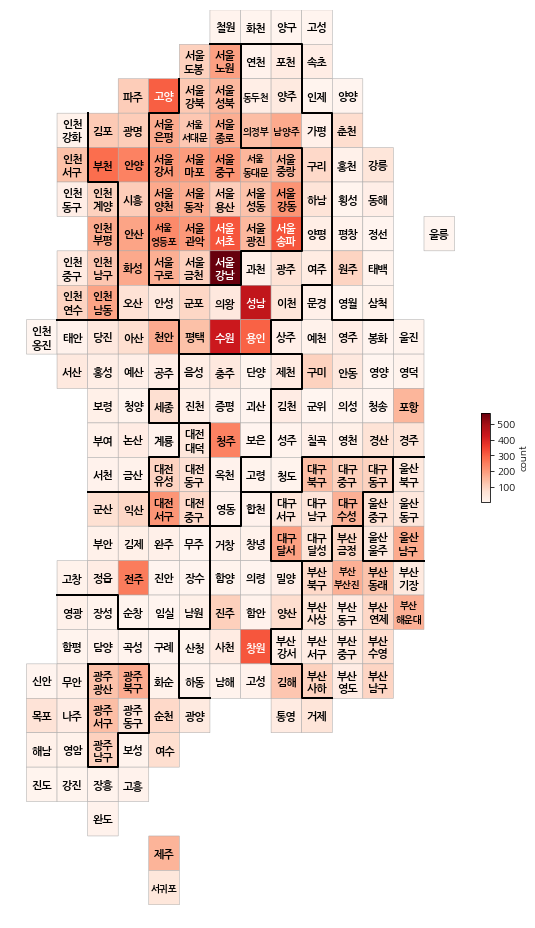

In [20]:
drawKorea('count', dent_t_df, 'd1', 'd2', 'Reds')

#### 이번엔 인구 데이터를 가져옵니다.

In [21]:
addr_pop_df = pd.read_csv('./korea_population_density.csv')
addr_pop_df.index = addr_pop_df.apply(lambda r: r['addr'], axis=1)

In [22]:
addr_dent_pop = pd.merge(addr_pop_df, dent_t_df, how='outer', left_index=True, right_index=True)
addr_dent_pop

,addr,population_count,area,density,d1,d2,count,shortname,x,y
강원도 강릉시,강원도 강릉시,213605,1040.38,205.31,강원도,강릉시,54,강릉,11,4.0
강원도 고성군,강원도 고성군,29188,661.11,44.15,강원도,고성군,5,고성(강원),9,0.0
강원도 동해시,강원도 동해시,93085,180.20,516.57,강원도,동해시,25,동해,11,5.0
강원도 삼척시,강원도 삼척시,68812,1187.09,57.97,강원도,삼척시,14,삼척,11,8.0
강원도 속초시,강원도 속초시,82318,105.72,778.63,강원도,속초시,29,속초,9,1.0
강원도 양구군,강원도 양구군,23749,661.89,35.88,강원도,양구군,5,양구,8,0.0
강원도 양양군,강원도 양양군,27254,630.08,43.25,강원도,양양군,5,양양,10,2.0
강원도 영월군,강원도 영월군,40085,1127.62,35.55,강원도,영월군,6,영월,10,8.0
강원도 원주시,강원도 원주시,338701,867.82,390.29,강원도,원주시,97,원주,10,7.0
강원도 인제군,강원도 인제군,32532,1645.17,19.77,강원도,인제군,6,인제,9,2.0


#### 치과 지수를 그리기 위해 인구수 대비 치과 개수를 구하고 10000을 곱해줍니다.

In [23]:
addr_dent_pop['dent_rate'] = addr_dent_pop['count']/addr_dent_pop['population_count']*10000
# 치과 지수가 높은 지역 순으로 출력합니다.
addr_dent_pop.sort_values('dent_rate', ascending=False)

,addr,population_count,area,density,d1,d2,count,shortname,x,y,dent_rate
서울특별시 중구,서울특별시 중구,124714,9.96,12520.80,서울특별시,중구,212,서울중구,6,4.0,16.998893
대구광역시 중구,대구광역시 중구,79522,7.06,11271.30,대구광역시,중구,106,대구중구,10,13.0,13.329645
서울특별시 종로구,서울특별시 종로구,152398,23.91,6373.05,서울특별시,종로구,167,서울종로,6,3.0,10.958149
서울특별시 강남구,서울특별시 강남구,566590,39.50,14343.80,서울특별시,강남구,573,서울강남,6,7.0,10.113133
부산광역시 중구,부산광역시 중구,45083,2.83,15952.57,부산광역시,중구,41,부산중구,10,18.0,9.094337
서울특별시 서초구,서울특별시 서초구,447099,47.00,9512.37,서울특별시,서초구,319,서울서초,6,6.0,7.134885
서울특별시 영등포구,서울특별시 영등포구,369064,24.53,15045.68,서울특별시,영등포구,231,서울영등포,4,6.0,6.259077
광주광역시 동구,광주광역시 동구,96369,49.21,1958.50,광주광역시,동구,55,광주동구,3,20.0,5.707230
서울특별시 마포구,서울특별시 마포구,378974,23.84,15893.69,서울특별시,마포구,199,서울마포,5,4.0,5.251020
울산광역시 남구,울산광역시 남구,339871,73.02,4654.42,울산광역시,남구,175,울산남구,12,15.0,5.149012


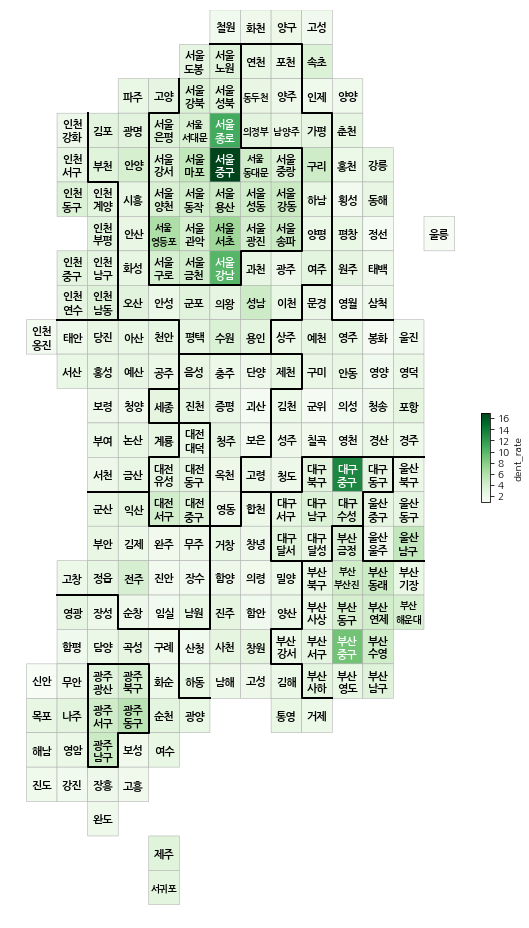

In [24]:
drawKorea('dent_rate', addr_dent_pop, 'd1', 'd2', 'Greens')

In [25]:
import scipy.stats

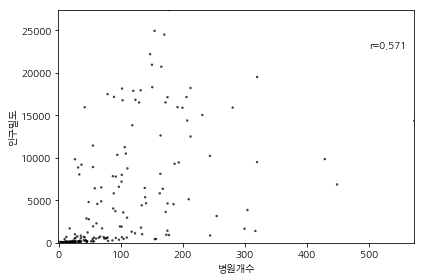

In [26]:
def plot_nstores(var, b1, b2, label1, label2):
    plt.scatter(var[b1] + np.random.random(len(var)),
                var[b2] + np.random.random(len(var)),
                edgecolor='none', alpha=0.75, s=6, c='black')
    plt.xlim(-1, max(var[b1]))
    plt.ylim(-1, max(var[b2]))
    plt.xlabel(label1)
    plt.ylabel(label2)
    
    r = scipy.stats.pearsonr(var[b1], var[b2])
    plt.annotate('r={:.3f}'.format(r[0]), (500, 23000))

# ax = fig.add_subplot(1, 3, 1)
plot_nstores(addr_dent_pop, 'count', 'density', '병원개수', "인구밀도")
plt.tight_layout()

In [27]:
addr_dent_pop[(addr_dent_pop['count'] <200) & (addr_dent_pop['density']>17000)]

,addr,population_count,area,density,d1,d2,count,shortname,x,y,dent_rate
부산광역시 수영구,부산광역시 수영구,178525,10.21,17492.66,부산광역시,수영구,78,부산수영,11,18.0,4.369136
부산광역시 연제구,부산광역시 연제구,207738,12.10,17172.30,부산광역시,연제구,89,부산연제,11,17.0,4.284243
서울특별시 광진구,서울특별시 광진구,357397,17.06,20945.30,서울특별시,광진구,150,서울광진,7,6.0,4.197013
서울특별시 구로구,서울특별시 구로구,416766,20.12,20715.29,서울특별시,구로구,165,서울구로,4,7.0,3.959056
서울특별시 금천구,서울특별시 금천구,236302,13.02,18149.53,서울특별시,금천구,102,서울금천,5,7.0,4.316510
서울특별시 동대문구,서울특별시 동대문구,354403,14.21,24934.36,서울특별시,동대문구,154,서울동대문,7,4.0,4.345336
서울특별시 동작구,서울특별시 동작구,400588,16.35,24494.96,서울특별시,동작구,170,서울동작,5,5.0,4.243762
서울특별시 서대문구,서울특별시 서대문구,314974,17.61,17889.38,서울특별시,서대문구,120,서울서대문,5,3.0,3.809838
서울특별시 성동구,서울특별시 성동구,302612,16.86,17947.99,서울특별시,성동구,131,서울성동,7,5.0,4.328976
서울특별시 성북구,서울특별시 성북구,450005,24.58,18308.76,서울특별시,성북구,150,서울성북,6,2.0,3.333296
